In [97]:
import numpy as np
import pandas as pd
import numpy as np
import glob
import json
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from IPython.display import display

In [98]:
competitions = pd.read_json("./data/competitions.json")
competitions.tail()

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
33,11,38,Spain,La Liga,male,2005/2006,2020-07-29T05:00,2020-07-29T05:00
34,11,37,Spain,La Liga,male,2004/2005,2020-07-29T05:00,2020-07-29T05:00
35,49,3,United States of America,NWSL,female,2018,2020-07-29T05:00,2020-07-29T05:00
36,2,44,England,Premier League,male,2003/2004,2020-08-31T20:40:28.969635,2020-08-31T20:40:28.969635
37,72,30,International,Women's World Cup,female,2019,2020-07-29T05:00,2020-07-29T05:00


In [137]:
#get La Liga competition
laliga = competitions[competitions["competition_name"].str.match("La Liga")]
laliga_id = laliga.iloc[1].competition_id

#read all json files from the folder of competition La Liga and concatenate them
path = "./data/matches/{}/*.json".format(laliga_id)
all_files = glob.glob(path)
la_liga_matches = pd.DataFrame()

for f in all_files:
    with open(f) as file:
        data = json.load(file)
        norm = pd.json_normalize(data)
        la_liga_matches = la_liga_matches.append(norm)
    
la_liga_matches.index = range(la_liga_matches.shape[0])
pd.options.display.max_columns = None
display(la_liga_matches.head())

,match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name
0,69225,2008-12-13,22:00:00.000,2,0,available,2020-07-29T05:00,15,11,Spain,La Liga,41,2008/2009,217,Barcelona,male,None,214,Spain,"[{'id': 36, 'name': 'Josep Guardiola i Sala', ...",220,Real Madrid,male,None,214,Spain,"[{'id': 3899, 'name': 'Juan de la Cruz Ramos C...",1.1.0,2,2,1,Regular Season,342.0,Camp Nou,214.0,Spain,1011.0,Luis Medina Cantalejo,NaN,NaN
1,69212,2008-10-04,22:00:00.000,6,1,available,2020-07-29T05:00,6,11,Spain,La Liga,41,2008/2009,217,Barcelona,male,None,214,Spain,"[{'id': 36, 'name': 'Josep Guardiola i Sala', ...",212,Atlético Madrid,male,None,214,Spain,"[{'id': 3196, 'name': 'Javier Aguirre Onaindía...",1.1.0,2,2,1,Regular Season,342.0,Camp Nou,214.0,Spain,1070.0,Iturralde,NaN,NaN
2,69235,2008-11-01,20:00:00.000,1,4,available,2020-07-29T05:00,9,11,Spain,La Liga,41,2008/2009,223,Málaga,male,None,214,Spain,NaN,217,Barcelona,male,None,214,Spain,NaN,1.1.0,2,2,1,Regular Season,346.0,Estadio La Rosaleda,214.0,Spain,407.0,Carlos Velasco Carballo,214.0,Spain
3,69232,2008-10-25,22:00:00.000,5,0,available,2020-07-29T05:00,8,11,Spain,La Liga,41,2008/2009,217,Barcelona,male,None,214,Spain,NaN,403,Almería,male,None,214,Spain,NaN,1.1.0,2,2,1,Regular Season,342.0,Camp Nou,214.0,Spain,1007.0,Alfonso Perez Burrull,NaN,NaN
4,69216,2009-03-07,20:00:00.000,2,0,available,2020-07-29T05:00,26,11,Spain,La Liga,41,2008/2009,217,Barcelona,male,None,214,Spain,"[{'id': 36, 'name': 'Josep Guardiola i Sala', ...",215,Athletic Bilbao,male,None,214,Spain,"[{'id': 497, 'name': 'Joaquín de Jesús Caparró...",1.1.0,2,2,1,Regular Season,342.0,Camp Nou,214.0,Spain,221.0,Alberto Undiano,112.0,Italy


In [138]:
la_liga_matches["away_team.away_team_name"].unique()

array(['Real Madrid', 'Atlético Madrid', 'Barcelona', 'Almería',
       'Athletic Bilbao', 'Sporting Gijón', 'Villarreal',
       'Recreativo Huelva', 'Málaga', 'Espanyol', 'Numancia',
       'Racing Santander', 'Valencia', 'Real Betis',
       'Deportivo La Coruna', 'Real Valladolid', 'Levante',
       'Real Zaragoza', 'Osasuna', 'Mallorca', 'Sevilla', 'Albacete',
       'Getafe', 'Tenerife', 'Xerez', 'Granada', 'Rayo Vallecano',
       'Celta Vigo', 'Eibar', 'Real Sociedad', 'Córdoba', 'Elche',
       'Las Palmas', 'Leganés', 'Girona', 'Deportivo Alavés', 'Hércules',
       'Huesca'], dtype=object)

In [139]:
laliga_cleaned = la_liga_matches[["match_id", "match_date", "kick_off", "match_week", "season.season_name", "home_team.home_team_id", "home_team.home_team_name", "home_score", "away_score", "away_team.away_team_name", "away_team.away_team_id", "stadium.name", "referee.name" ]]
#laliga_cleaned

In [140]:
result = []
for i in range(laliga_cleaned.shape[0]):
    if (laliga_cleaned.iloc[i].home_score > laliga_cleaned.iloc[i].away_score):
        result.append("1")
    elif (laliga_cleaned.iloc[i].home_score < laliga_cleaned.iloc[i].away_score): 
        result.append("2")
    else:
        result.append("x")

laliga_cleaned["result"] = result
laliga_cleaned.columns = ["match_id", "match_date", "kick_off", "match_week", "season", "home_team_id", "home_team_name", "home_score", 
                         "away_score", "away_team_name", "away_team_id", "stadium_name", "referee_name", "result"]
laliga_cleaned

,match_id,match_date,kick_off,match_week,season,home_team_id,home_team_name,home_score,away_score,away_team_name,away_team_id,stadium_name,referee_name,result
0,69225,2008-12-13,22:00:00.000,15,2008/2009,217,Barcelona,2,0,Real Madrid,220,Camp Nou,Luis Medina Cantalejo,1
1,69212,2008-10-04,22:00:00.000,6,2008/2009,217,Barcelona,6,1,Atlético Madrid,212,Camp Nou,Iturralde,1
2,69235,2008-11-01,20:00:00.000,9,2008/2009,223,Málaga,1,4,Barcelona,217,Estadio La Rosaleda,Carlos Velasco Carballo,2
3,69232,2008-10-25,22:00:00.000,8,2008/2009,217,Barcelona,5,0,Almería,403,Camp Nou,Alfonso Perez Burrull,1
4,69216,2009-03-07,20:00:00.000,26,2008/2009,217,Barcelona,2,0,Athletic Bilbao,215,Camp Nou,Alberto Undiano,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,69338,2012-01-28,22:00:00.000,21,2011/2012,222,Villarreal,0,0,Barcelona,217,Estadio de la Cerámica,José Teixeira,x
481,70220,2011-09-17,20:00:00.000,4,2011/2012,217,Barcelona,8,0,Osasuna,422,Camp Nou,César Muñiz,1
482,70224,2012-04-29,21:30:00.000,36,2011/2012,360,Rayo Vallecano,0,7,Barcelona,217,Estadio de Vallecas,Carlos Delgado,2
483,70221,2012-04-14,22:00:00.000,34,2011/2012,221,Levante,1,2,Barcelona,217,Estadio Ciudad de Valencia,José Teixeira,2


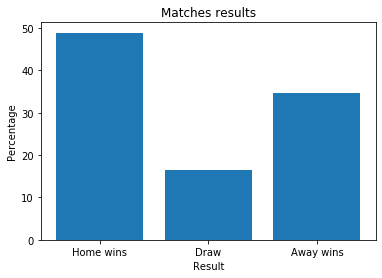

In [141]:
home_wins = laliga_cleaned[laliga_cleaned["result"] == "1"].shape[0]
draw = laliga_cleaned[laliga_cleaned["result"] == "x"].shape[0]
away_wins = laliga_cleaned[laliga_cleaned["result"] == "2"].shape[0]
x = ["Home wins", "Draw", "Away wins"]
total = laliga_cleaned.shape[0]
y = [home_wins / total * 100, draw / total * 100, away_wins / total * 100]

plt.bar(x, y)
plt.xlabel("Result")
plt.ylabel("Percentage")
plt.title("Matches results")
plt.show()

In [142]:
barca_home = laliga_cleaned[laliga_cleaned["home_team_name"] == "Barcelona"]
barca_home_wins = barca_home[barca_home["result"] == "1"]
percentage_barca_wins_home = barca_home_wins.shape[0] / barca_home.shape[0]
percentage_barca_wins_home

real_home = laliga_cleaned[laliga_cleaned["home_team_name"] == "Real Madrid"]
real_home_wins = real_home[real_home["result"] == "1"]
percentage_real_wins_home = real_home_wins.shape[0] / real_home.shape[0]
percentage_real_wins_home

"Real Madrid wins the {}% of the home games while Barcelona wins the {}%".format(round(percentage_real_wins_home *100),round(percentage_barca_wins_home *100))

'Real Madrid wins the 33% of the home games while Barcelona wins the 84%'

In [143]:
barca_away = laliga_cleaned[laliga_cleaned["away_team_name"] == "Barcelona"]
barca_away_wins = barca_away[barca_away["result"] == "2"]
percentage_barca_wins_away = barca_away_wins.shape[0] / barca_away.shape[0]
percentage_barca_wins_away

real_away = laliga_cleaned[laliga_cleaned["away_team_name"] == "Real Madrid"]
real_away_wins = real_away[real_away["result"] == "2"]
percentage_real_wins_away = real_away_wins.shape[0] / real_away.shape[0]
percentage_real_wins_away

"Real Madrid wins the {}% of the away games while Barcelona wins the {}%".format(round(percentage_real_wins_away *100),round(percentage_barca_wins_away*100))

'Real Madrid wins the 17% of the away games while Barcelona wins the 64%'

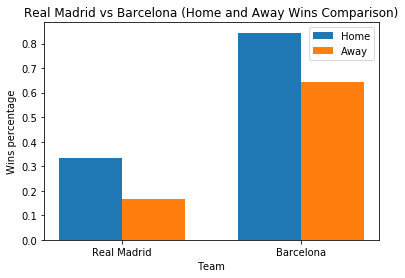

In [144]:
home_res = (percentage_real_wins_home, percentage_barca_wins_home)
away_res = (percentage_real_wins_away, percentage_barca_wins_away)
n = 2
ind = np.arange(2) 
width = 0.35       

plt.bar(ind, home_res, width, label='Home')
plt.bar(ind + width, away_res, width, label='Away')
plt.ylabel("Wins percentage")
plt.xlabel("Team")
plt.xticks(ind + width / 2, ('Real Madrid', 'Barcelona'))
plt.legend(loc='best')
plt.title("Real Madrid vs Barcelona (Home and Away Wins Comparison)")

plt.show()


In [145]:
first_round = laliga_cleaned[laliga_cleaned["match_week"] <= 19]
second_round = laliga_cleaned[laliga_cleaned["match_week"] > 19]

home_wins_first_round = first_round[first_round["result"] == "1"].shape[0]
draw_first_round = first_round[first_round["result"] == "x"].shape[0]
away_wins_first_round = first_round[first_round["result"] == "2"].shape[0]

home_wins_second_round = second_round[second_round["result"] == "1"].shape[0]
draw_second_round = second_round[second_round["result"] == "x"].shape[0]
away_wins_second_round = second_round[second_round["result"] == "2"].shape[0]

wins = (home_wins_first_round * 100 / first_round.shape[0], home_wins_second_round * 100 / second_round.shape[0] )
draw = (draw_first_round * 100 / first_round.shape[0], draw_second_round * 100 / second_round.shape[0])
loses = (away_wins_first_round * 100 / first_round.shape[0], away_wins_second_round * 100 / second_round.shape[0] )

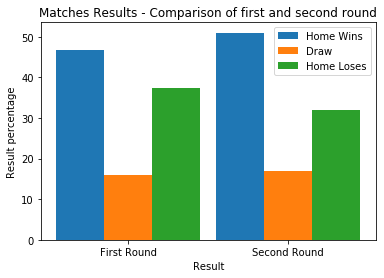

In [146]:
n = 2
ind = np.arange(2) 
width = 0.3       

plt.bar(ind, wins, width, label='Home Wins')
plt.bar(ind + width, draw, width, label='Draw')
plt.bar(ind + 2 * width, loses, width, label='Home Loses')

plt.ylabel("Result percentage")
plt.xlabel("Result")
plt.xticks(ind + 2 * width / 2, ('First Round', 'Second Round'))
plt.legend(loc='best')
plt.title("Matches Results - Comparison of first and second round")

plt.show()

In [148]:
#barca real head to head
barca_real = laliga_cleaned[(laliga_cleaned["home_team_name"] == "Barcelona") &
                           (laliga_cleaned["away_team_name"] == "Real Madrid")]

real_barca = laliga_cleaned[(laliga_cleaned["home_team_name"] == "Real Madrid") &
                           (laliga_cleaned["away_team_name"] == "Barcelona")]

#goals
#results
#guess the winner (make bins of the match_week)

barca_real
real_barca.head()

,match_id,match_date,kick_off,match_week,season,home_team_id,home_team_name,home_score,away_score,away_team_name,away_team_id,stadium_name,referee_name,result
18,69249,2009-05-02,20:00:00.000,34,2008/2009,220,Real Madrid,2,6,Barcelona,217,Estadio Santiago Bernabéu,Alberto Undiano,2
57,68361,2008-05-07,22:00:00.000,36,2007/2008,220,Real Madrid,4,1,Barcelona,217,Estadio Santiago Bernabéu,Alfonso Perez Burrull,1
81,69259,2010-04-10,22:00:00.000,31,2009/2010,220,Real Madrid,0,2,Barcelona,217,Estadio Santiago Bernabéu,Mejuto,2
115,267085,2014-10-25,18:00:00.000,9,2014/2015,220,Real Madrid,3,1,Barcelona,217,Estadio Santiago Bernabéu,Jesús Gil,1
165,266424,2015-11-21,18:15:00.000,12,2015/2016,220,Real Madrid,0,4,Barcelona,217,Estadio Santiago Bernabéu,David Fernández,2


In [149]:
real_barca_res = real_barca.groupby(["result"])
barca_real_res = barca_real.groupby(["result"])

real_wins = real_barca_res.get_group("1").shape[0]
real_wins_goals = real_barca_res.get_group("1").home_score.mean() #when real wins how many goals in average
real_wins_goals_conc = real_barca_res.get_group("1").away_score.mean() #when real wins how many goals barca scores

real_loses = real_barca_res.get_group("2").shape[0]
real_loses_goals = real_barca_res.get_group("2").home_score.mean() #when real loses how many goals in average
real_loses_goals_conc = real_barca_res.get_group("2").away_score.mean() #when real loses how many goals barca scores

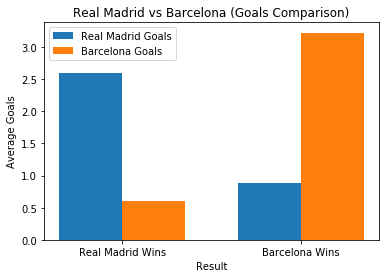

In [150]:
real_g = (real_wins_goals, real_loses_goals) #real madrid goals
real_gc = (real_wins_goals_conc, real_loses_goals_conc) #real madrid goals conceded
n = 2
ind = np.arange(2) 
width = 0.35       

plt.bar(ind, real_g, width, label='Real Madrid Goals')
plt.bar(ind + width, real_gc, width, label='Barcelona Goals')
plt.ylabel("Average Goals")
plt.xlabel("Result")
plt.xticks(ind + width / 2, ('Real Madrid Wins', 'Barcelona Wins'))
plt.legend(loc='best')
plt.title("Real Madrid vs Barcelona (Goals Comparison)")

plt.show()


In [189]:
#get by season to show barcelona average goals
barca_matches_home = laliga_cleaned[(laliga_cleaned["home_team_name"] == "Barcelona")] 
barca_matches_away = laliga_cleaned[(laliga_cleaned["away_team_name"] == "Barcelona")]

season_groups = barca_matches_home.groupby("season")
barca_goals_home = []
barca_goals_away = []

#for i in range(season_groups.groups):
i = 0;
seasons_names = []
for name, group in season_groups:
    #print(name)
    seasons_names.append(name)
    barca_goals_home.append(group.home_score.mean())
    barca_goals_away.append(group.away_score.mean())
    i += 1

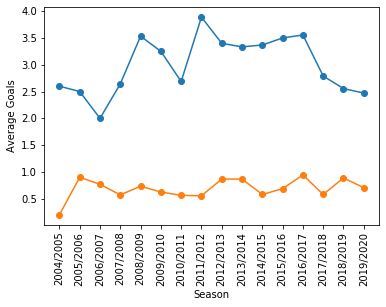

In [190]:
no_of_seasons = range(i)
plt.plot(no_of_seasons, barca_goals_home, no_of_seasons, barca_goals_away, marker = "o" )
plt.xticks(no_of_seasons, seasons_names, rotation = "vertical")
plt.xlabel("Season")
plt.ylabel("Average Goals")
plt.show()

In [273]:
barca_home_matches_11_12 = barca_home[barca_home["season"] == "2012/2013"]
barca_home_matches_ids_11_12 = barca_home_matches_11_12.match_id

#barca_home
barca_home_matches_11_12


def f(row):
    if row["away_score"] >= 1:
        val = True
    else:
        val = False
    return val

barca_home_matches_11_12["conc"] = barca_home_matches_11_12.apply(f, axis = 1)
barca_home_matches_11_12

,match_id,match_date,kick_off,match_week,season,home_team_id,home_team_name,home_score,away_score,away_team_name,away_team_id,stadium_name,referee_name,result,conc
243,70270,2012-09-22,22:00:00.000,5,2012/2013,217,Barcelona,2,0,Granada,1049,Camp Nou,Carlos Del Cerro,1,False
244,70281,2013-05-05,21:00:00.000,34,2012/2013,217,Barcelona,4,2,Real Betis,218,Camp Nou,Clos Gómez,1,True
245,70308,2012-11-03,18:00:00.000,10,2012/2013,217,Barcelona,3,1,Celta Vigo,209,Camp Nou,David Fernández,1,True
248,70271,2013-02-23,22:00:00.000,25,2012/2013,217,Barcelona,2,1,Sevilla,213,Camp Nou,Carlos Velasco Carballo,1,True
254,70296,2012-12-16,21:00:00.000,16,2012/2013,217,Barcelona,4,1,Atlético Madrid,212,Camp Nou,Miguel Pérez,1,True
255,70297,2013-02-10,12:00:00.000,23,2012/2013,217,Barcelona,6,1,Getafe,216,Camp Nou,Ignacio Iglesias,1,True
256,266433,2013-01-06,19:00:00.000,18,2012/2013,217,Barcelona,4,0,Espanyol,214,Camp Nou,Jesús Gil,1,False
258,70259,2012-08-19,21:00:00.000,1,2012/2013,217,Barcelona,5,1,Real Sociedad,210,Camp Nou,José González,1,True
259,70260,2013-01-27,19:00:00.000,21,2012/2013,217,Barcelona,5,1,Osasuna,422,Camp Nou,Fernando Teixeira,1,True
260,70263,2012-12-01,20:00:00.000,14,2012/2013,217,Barcelona,5,1,Athletic Bilbao,215,Camp Nou,Antonio Mateu,1,True


In [290]:
#print(all_files)
match_p = pd.DataFrame()
player_played = []
i = 0

for match in barca_home_matches_ids_11_12:
    path = "./data/lineups/{}.json".format(match)
    with open(path) as f:
        a = json.load(f)
        norm = pd.json_normalize(a, "lineup")
        if "Cesc Fàbregas" in norm.player_nickname.values:
            player_played.append(True)
        else:
            player_played.append(False)
            
        i += 1
        match_p = match_p.append(norm)

        
barca_home_matches_11_12["player"] = player_played
barca_home_matches_11_12

,match_id,match_date,kick_off,match_week,season,home_team_id,home_team_name,home_score,away_score,away_team_name,away_team_id,stadium_name,referee_name,result,conc,pique,player
243,70270,2012-09-22,22:00:00.000,5,2012/2013,217,Barcelona,2,0,Granada,1049,Camp Nou,Carlos Del Cerro,1,False,False,True
244,70281,2013-05-05,21:00:00.000,34,2012/2013,217,Barcelona,4,2,Real Betis,218,Camp Nou,Clos Gómez,1,True,True,False
245,70308,2012-11-03,18:00:00.000,10,2012/2013,217,Barcelona,3,1,Celta Vigo,209,Camp Nou,David Fernández,1,True,True,True
248,70271,2013-02-23,22:00:00.000,25,2012/2013,217,Barcelona,2,1,Sevilla,213,Camp Nou,Carlos Velasco Carballo,1,True,False,False
254,70296,2012-12-16,21:00:00.000,16,2012/2013,217,Barcelona,4,1,Atlético Madrid,212,Camp Nou,Miguel Pérez,1,True,True,False
255,70297,2013-02-10,12:00:00.000,23,2012/2013,217,Barcelona,6,1,Getafe,216,Camp Nou,Ignacio Iglesias,1,True,True,False
256,266433,2013-01-06,19:00:00.000,18,2012/2013,217,Barcelona,4,0,Espanyol,214,Camp Nou,Jesús Gil,1,False,True,True
258,70259,2012-08-19,21:00:00.000,1,2012/2013,217,Barcelona,5,1,Real Sociedad,210,Camp Nou,José González,1,True,True,True
259,70260,2013-01-27,19:00:00.000,21,2012/2013,217,Barcelona,5,1,Osasuna,422,Camp Nou,Fernando Teixeira,1,True,False,True
260,70263,2012-12-01,20:00:00.000,14,2012/2013,217,Barcelona,5,1,Athletic Bilbao,215,Camp Nou,Antonio Mateu,1,True,True,True


In [291]:
#we want to see if there is a correalation between Cesc playing and away score is not 0
round(np.corrcoef(barca_home_matches_11_12["conc"], barca_home_matches_11_12["player"])[0,1],2)
#when Cesc does not play, there is a small correlation that Barca's defence is not that good.

-0.36